In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np

In [12]:
# Define constant
PI = np.pi

In [135]:
def build_waves(lambd, x1, x2, x3, y1, x_vals, y_vals):
    """Calculate interference pattern of waves"""
    # Get pattern
    k=2*PI/lambd
    
    r1= np.sqrt((x_vals - x1)**2 + (y_vals + y1)**2)
    phase1=-k*x1
    wave1 = np.sin(phase1-k*r1)/r1
    
    r2= np.sqrt((x_vals - x2)**2 + y_vals**2)
    phase2=-k*x2
    wave2 = np.sin(phase2-k*r2)/r2
    
    r3= np.sqrt((x_vals - x3)**2 + y_vals**2)
    phase3=-k*x3
    wave3 = np.sin(phase3-k*r3)/r3
    
    r4= np.sqrt((x_vals - x1)**2 + (y_vals - y1)**2)
    phase4=-k*x1
    wave4 = np.sin(phase4-k*r4)/r4
    
    f1=0   #oben
    f2=1   #links
    f3=1   #rechts
    f4=0   #unten

    wave = np.log10(np.abs( f1*wave1 + f2*wave2 + f3*wave3 + f4*wave4 )+0.0000000001)
    # workaround to prevent zero in log

    # Convert to integer (for plotting)
    wv_min, wv_max = wave.min(), wave.max()
    return np.rint(1000 * (wave - wv_min) / (wv_max - wv_min)).astype(dtype=np.uint16)

In [136]:
def plot_field(lambd, distance, ratio=1/2):
    """
    lambd: Wellenlängen in [nm]
    distance: Abstand in [nm]
    ratio: Seitenverhältnis der Darstellung
    """
    # Convert wavelengths to [m]
    #lambda1 *= 1e-9
    #lambda2 *= 1e-9

    # Get dimensions
    space = 2
    x_res = 2000
    y_res = x_res * ratio
    x_min = -3*(distance+lambd)
    x_max = 3*(distance+lambd)
    y_min = x_min * ratio
    y_max = x_max * ratio
    x1 = 0
    x2 = -distance /space
    x3 = distance / space
    y1 = distance / space

    # Set axis values
    x_vals = np.linspace(x_min, x_max, x_res).reshape((1,-1))
    y_vals = np.linspace(y_min, y_max, y_res).reshape((-1,1))

    # Calculate intereference pattern
    wave = build_waves(lambd, x1, x2, x3, y1, x_vals, y_vals)

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(wave, aspect='equal', extent=(x_min, x_max, y_min, y_max), cmap="gray") # "gray" or "RdYlGn"
    ax.plot([x1, x2, x3, x1], [y1,0,0,-y1], 'rx')
    ax.set_xlabel("$x$ [nm]")
    ax.set_ylabel("$y$ [nm]")
    ax.set_title(r"$\lambda$ = {}nm".format(lambd))
    

<IPython.core.display.Javascript object>


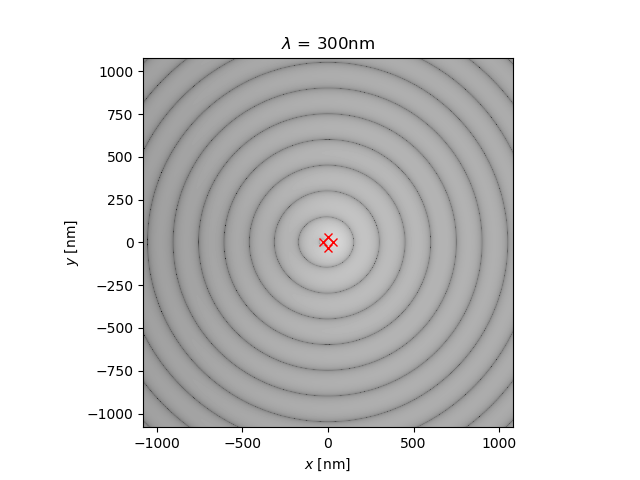

In [147]:
Lambda = 300
Distance = 60
plot_field(Lambda, Distance, 1)